# Overfitting this time neural networks??

chapter 2, PAC learning

In [1]:
import numpy as np
import random
import sklearn.neural_network
import sklearn.tree

import matplotlib.pyplot as plt
plt.style.use("lecture.mplstyle")


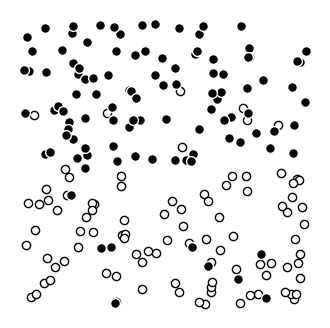

In [2]:
N=200
X=np.array([2*np.random.random(size=N)-1,2*np.random.random(size=N)-1]).T

def rnd_class(x):
    if x[1]<0:
        bayes_class=-1
    else:
        bayes_class=1
    if random.random()<=0.9:
        return bayes_class
    else:
        return -bayes_class
    
y=np.array([rnd_class(x) for x in X])

colourmap='binary' 
_,ax=plt.subplots(figsize=(4,4))
whites=X[y==-1]
blacks=X[y==1]
ax.scatter(whites[:,0],whites[:,1],c="white",edgecolor="black",s=35)
ax.scatter(blacks[:,0],blacks[:,1],c="black",edgecolor="white",s=50)
ax.axis("off")
plt.show()

In [3]:
net_small=sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(10,),max_iter=20000)
net_small.fit(X,y)

net_large=sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,100),max_iter=20000)
net_large.fit(X,y)


MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=20000)

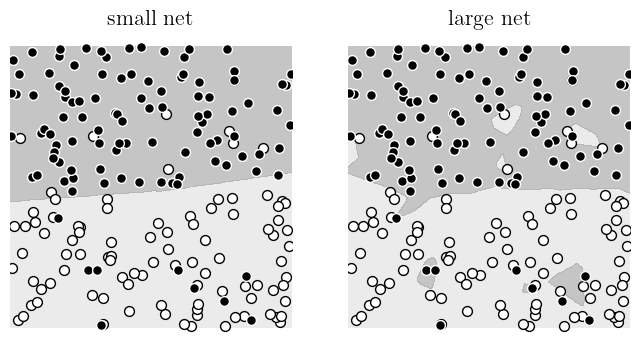

In [4]:
# code to plot decision boundary
# best to ignore this
resolution=500
L=np.linspace(-1,1,resolution)
XX,YY=np.meshgrid(L,L)

_,axs=plt.subplots(1,2,figsize=(8,4))
for ax,dt,title in zip(axs,[net_small,net_large],["small net","large net"]):
    Z=dt.predict(np.array([XX.flatten(),YY.flatten()]).T)
    Z=Z.reshape(XX.shape)
    ax.contourf(XX,YY,Z,alpha=0.3,cmap="binary",levels=1)  # alpha controls opacity, but here only serves to fade out the colours a bit 
    whites=X[y==-1]
    blacks=X[y==1]
    ax.scatter(whites[:,0],whites[:,1],c="white",edgecolor="black",s=50)
    ax.scatter(blacks[:,0],blacks[:,1],c="black",edgecolor="white",s=50)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("equal")
    ax.set_title(title,fontsize=16)
#plt.tight_layout()
plt.savefig("dec_overfit.png",dpi=300)

In [5]:
full_tree=sklearn.tree.DecisionTreeClassifier()
full_tree.fit(X,y)

small_tree=sklearn.tree.DecisionTreeClassifier(max_depth=1)
small_tree.fit(X,y)

DecisionTreeClassifier(max_depth=1)

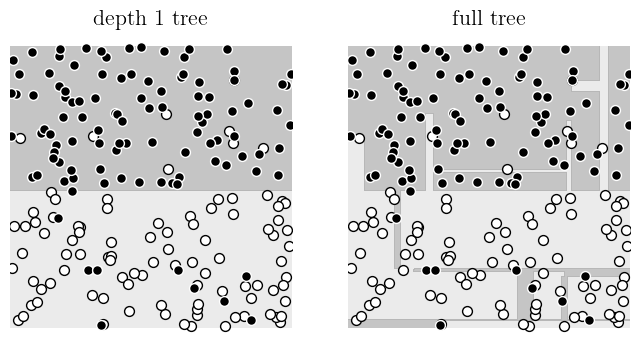

In [6]:
# code to plot decision boundary
# best to ignore this
resolution=500
L=np.linspace(-1,1,resolution)
XX,YY=np.meshgrid(L,L)

_,axs=plt.subplots(1,2,figsize=(8,4))
for ax,dt,title in zip(axs,[small_tree,full_tree],["depth 1 tree","full tree"]):
    Z=dt.predict(np.array([XX.flatten(),YY.flatten()]).T)
    Z=Z.reshape(XX.shape)
    ax.contourf(XX,YY,Z,alpha=0.3,cmap="binary",levels=1)  # alpha controls opacity, but here only serves to fade out the colours a bit 
    whites=X[y==-1]
    blacks=X[y==1]
    ax.scatter(whites[:,0],whites[:,1],c="white",edgecolor="black",s=50)
    ax.scatter(blacks[:,0],blacks[:,1],c="black",edgecolor="white",s=50)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("equal")
    ax.set_title(title,fontsize=16)
#plt.tight_layout()
plt.savefig("dec_overfit.png",dpi=300)

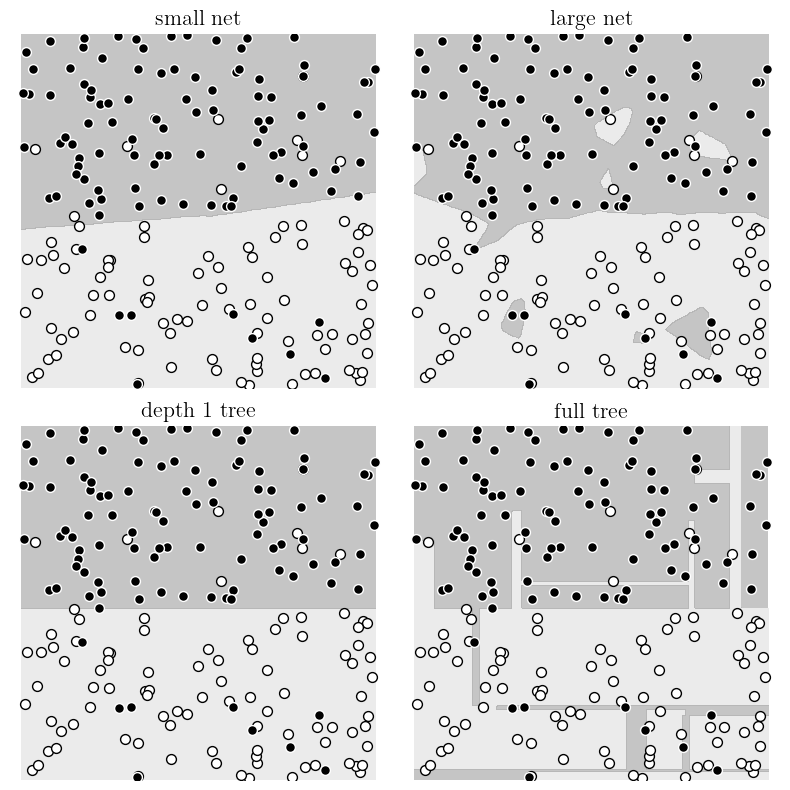

In [8]:
# code to plot decision boundary
# best to ignore this
resolution=500
L=np.linspace(-1,1,resolution)
XX,YY=np.meshgrid(L,L)

_,axs=plt.subplots(2,2,figsize=(8,8))
axs=axs.flat
for ax,dt,title in zip(axs,[net_small,net_large,small_tree,full_tree],["small net","large net","depth 1 tree","full tree"]):
    Z=dt.predict(np.array([XX.flatten(),YY.flatten()]).T)
    Z=Z.reshape(XX.shape)
    ax.contourf(XX,YY,Z,alpha=0.3,cmap="binary",levels=1)  # alpha controls opacity, but here only serves to fade out the colours a bit 
    whites=X[y==-1]
    blacks=X[y==1]
    ax.scatter(whites[:,0],whites[:,1],c="white",edgecolor="black",s=50)
    ax.scatter(blacks[:,0],blacks[:,1],c="black",edgecolor="white",s=50)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("equal")
    ax.set_title(title,fontsize=16)
plt.tight_layout()
plt.savefig("dec_overfit.png",dpi=300)